In [56]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
data = pd.read_csv('Salaries.csv')

In [58]:
data.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [59]:
data.shape

(397, 6)

<h2>Overview of data</h2>
<ul>
    <li>Data has 397 rows and 6 columns</li>
    <li>Rank - Categorical Variable - Depicts the rank of the employee</li>
    <li>Discipline - Categorical Variable - Depicts the dsicipline of the employee</li>
    <li>yrs.since.phd - Discrete Variable  - Depicts the years since phd of the employee</li>
    <li>yrs.service - Discrete Variable - Depicts the years of service of the employee</li>
    <li>sex - Categorical Variable - Depicts the sex of the employee</li>
    <li>salary - Outcome - Depicts the salary of the employee</li>
</ul>
<strong>Since we are predicting a continous variable this is a classification problem</strong>

In [60]:
data.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

<strong>Data has no null values</strong>

<h2>Exploratory Data Analysis</h2>

<h3>Striplots for categorical variables</h3>

In [61]:
Categorical_vars = ['rank', 'discipline', 'sex']
outcome_var = 'salary'

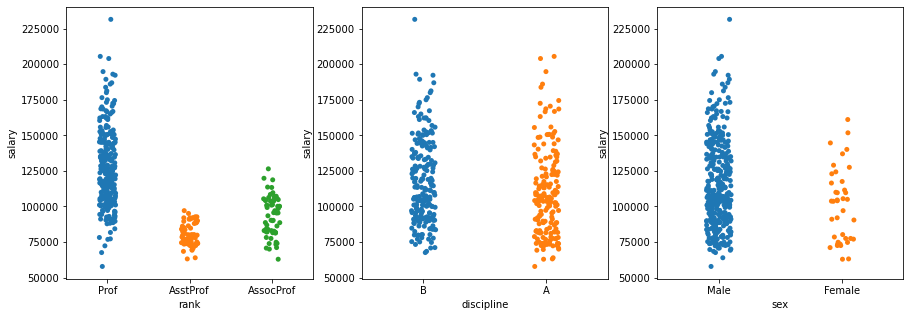

In [62]:
plt.figure(figsize=(15,5))
for i in range(len(Categorical_vars)):
    plt.subplot(1,3, i+1)
    sns.stripplot(x=data[Categorical_vars[i]], y=data[outcome_var])
    
plt.show()

<strong>From above stripplots we can concluse that -: 
        <ul>
            <li>Professors have highest Salaries, while AsstProf have lowest</li>
            <li>Salary in discipline A is a bioot more varied than in discipline B</li>
            <li>Male workers have higher salary than female workers, alos there are a lot more male workers than female workers</li>
        </ul>
</strong>

<h3>ScatterPlots for Discrete Varaibles</h3>

In [63]:
discrete_vars = ['yrs.since.phd','yrs.service']

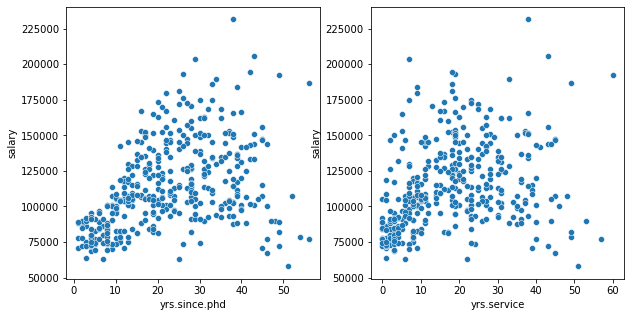

In [64]:
plt.figure(figsize=(10,5))
for i in range(len(discrete_vars)):
    plt.subplot(1,2,i+1)
    sns.scatterplot(x =data[discrete_vars[i]], y=data[outcome_var])
    
plt.show()

<strong>From Above scatterplots we can conclude that-:
        <ul>
            <li>Years Since Phd has an upwards trend with Salary</li>
            <li>Years of Service has an upwards trend with Salary</li>
            <li>There Might be some outliers in the years since service column</li>
        </ul>
</strong>

<h3>Pairplot</h3>

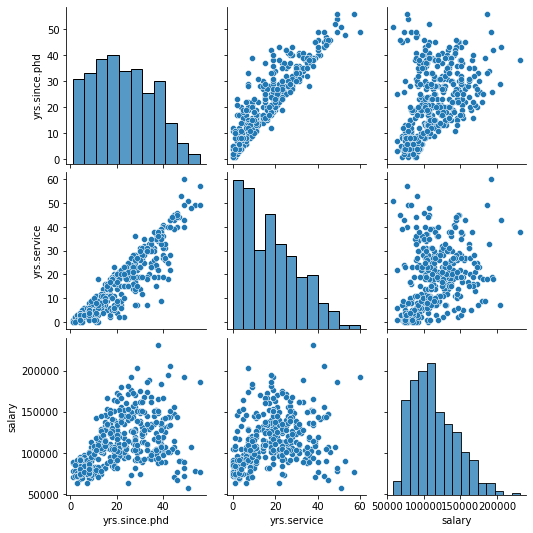

In [65]:
sns.pairplot(data)
plt.savefig('pairplot.png')
plt.show()

<strong>From Pairplot we can see that Years Since Phd and Years Service has high multicollinearity with each other</strong>

In [66]:
data.corr()

,yrs.since.phd,yrs.service,salary
yrs.since.phd,1.000000,0.909649,0.419231
yrs.service,0.909649,1.000000,0.334745
salary,0.419231,0.334745,1.000000


<strong>Outcomes from Correlation Matrix
    <ul>
        <li>Years Since phd has a correlation of 41% with Salary</li>
        <li>Years of Service has a correlation of 33% with Salary</li>
        <li>Years Since phd has a correlation of 90% with Years of Service</li>
    </ul>
</strong>

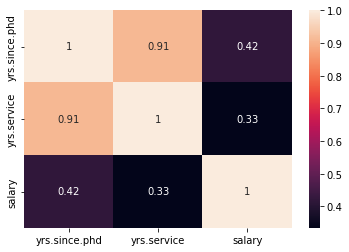

In [67]:
sns.heatmap(data.corr(), annot=True)

In [68]:
data.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


<strong>Outcome of descriptive Statistice
    <ul>
        <li>Years Since Phd
            <ul>
                <li>Mean - 22.31</li>
                <li>STD - 12.88</li>
                <li>Min - 1.00</li>
                <li>Max - 56.00</li>
            </ul>
        </li>
        <li>Years of Service
            <ul>
                <li>Mean - 17.61</li>
                <li>STD - 13.00</li>
                <li>Min - 0.00</li>
                <li>Max - 60.00</li>
            </ul>
        </li>
        <li>Salary
            <ul>
                <li>Mean - 113706</li>
                <li>STD - 30289</li>
                <li>Min - 57800</li>
                <li>Max - 231545</li>
            </ul>
        </li>
    </ul>
</strong>

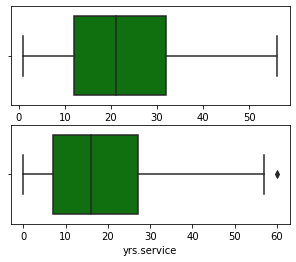

In [69]:
plt.figure(figsize=(5,4))
for i, col in enumerate(discrete_vars):
    plt.subplot(2,1, i+1)
    sns.boxplot(data[col], color='green',orient='v')
    
plt.show()

<strong>From the boxplot we can see that there are not many outliers in our dataset</strong>

In [70]:
data.skew()

yrs.since.phd    0.300880
yrs.service      0.650569
salary           0.714568
dtype: float64

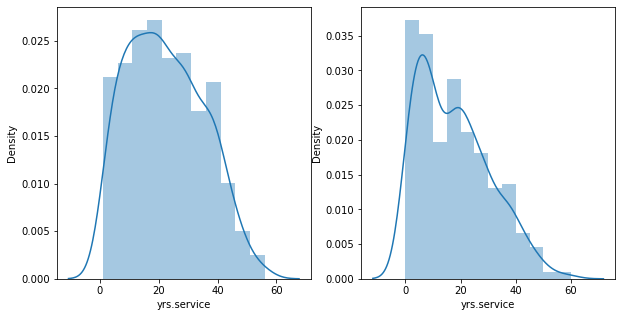

In [71]:
plt.figure(figsize=(10,5))
for i in range(len(discrete_vars)):
    plt.subplot(1,2,i+1)
    sns.distplot(x =data[discrete_vars[i]])
    plt.xlabel(col)
    
plt.show()

<strong>Data is slightly skewed in yrs.service</strong>

In [72]:
to_apply_z_df = data.drop(columns=['salary'])
to_apply_z_df

,rank,discipline,yrs.since.phd,yrs.service,sex
0,Prof,B,19,18,Male
1,Prof,B,20,16,Male
2,AsstProf,B,4,3,Male
3,Prof,B,45,39,Male
4,Prof,B,40,41,Male
...,...,...,...,...,...
392,Prof,A,33,30,Male
393,Prof,A,31,19,Male
394,Prof,A,42,25,Male
395,Prof,A,25,15,Male


In [73]:
from scipy.stats import zscore
z = np.abs(zscore(to_apply_z_df.iloc[:, 2:4]))
z.shape

(397, 2)

In [74]:
data_new = data[(z<3).all(axis=1)]
print("Old Shape", data.shape)
print("New Shape", data_new.shape)
print("Total Dropped Rows", data.shape[0] - data_new.shape[0])
data_new.isnull().sum()

Old Shape (397, 6)
New Shape (395, 6)
Total Dropped Rows 2


rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

Removing skewness using box-cox

In [75]:
from sklearn.preprocessing import power_transform
x = data_new.drop(columns=['salary'])
y = data_new['salary']
print(x.shape)
print(x.mean())
print(x.isnull().sum())

(395, 5)
yrs.since.phd    22.162025
yrs.service      17.407595
dtype: float64
rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
dtype: int64


In [76]:
x['yrs.service'] = power_transform(np.array(x.iloc[:,3]).reshape(-1,1), method='yeo-johnson')
x['yrs.since.phd'] = power_transform(np.array(x.iloc[:,2]).reshape(-1,1), method='yeo-johnson')

In [77]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x['yrs.service'] = sc.fit_transform(np.array(x.iloc[:,3]).reshape(-1,1))
x['yrs.since.phd'] = sc.transform(np.array(x.iloc[:,2]).reshape(-1,1))
x.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
dtype: int64

In [78]:
x

,rank,discipline,yrs.since.phd,yrs.service,sex
0,Prof,B,-0.121228,0.259854,Male
1,Prof,B,-0.042467,0.112315,Male
2,AsstProf,B,-1.625934,-1.287705,Male
3,Prof,B,1.591760,1.449089,Male
4,Prof,B,1.301965,1.540959,Male
...,...,...,...,...,...
392,Prof,A,0.870701,0.998921,Male
393,Prof,A,0.740983,0.330280,Male
394,Prof,A,1.419524,0.715524,Male
395,Prof,A,0.330379,0.034786,Male


In [79]:
print(x.mean())

yrs.since.phd    3.957453e-16
yrs.service     -3.597685e-17
dtype: float64


In [80]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
from sklearn.metrics import mean_absolute_error, mean_squared_error
x = pd.get_dummies(x)
x

,yrs.since.phd,yrs.service,rank_AssocProf,rank_AsstProf,rank_Prof,discipline_A,discipline_B,sex_Female,sex_Male
0,-0.121228,0.259854,0,0,1,0,1,0,1
1,-0.042467,0.112315,0,0,1,0,1,0,1
2,-1.625934,-1.287705,0,1,0,0,1,0,1
3,1.591760,1.449089,0,0,1,0,1,0,1
4,1.301965,1.540959,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...
392,0.870701,0.998921,0,0,1,1,0,0,1
393,0.740983,0.330280,0,0,1,1,0,0,1
394,1.419524,0.715524,0,0,1,1,0,0,1
395,0.330379,0.034786,0,0,1,1,0,0,1


In [81]:
for i in range(0,100):
    x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=i, test_size=0.10)
#     print(x_train.shape)
    lr.fit(x_train, y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    if True:
        print("At random state", i , ":")
        print("Training Score: ", round(lr.score(x_train, y_train)*100, 1))
        print("Testing Score :", round(lr.score(x_test, y_test)*100,1))
        print("Mean Absolute Error is :" ,mean_absolute_error(y_train, pred_train))
        print("Mean Squared Error is :" ,mean_squared_error(y_test, pred_test))

At random state 0 :
Training Score:  44.3
Testing Score : 59.1
Mean Absolute Error is : 16756.006866652035
Mean Squared Error is : 326703736.1859053
At random state 1 :
Training Score:  45.2
Testing Score : 48.9
Mean Absolute Error is : 16376.595063168455
Mean Squared Error is : 497719961.25772256
At random state 2 :
Training Score:  46.6
Testing Score : 32.2
Mean Absolute Error is : 16415.309855243922
Mean Squared Error is : 488544219.13335097
At random state 3 :
Training Score:  48.0
Testing Score : 23.3
Mean Absolute Error is : 15635.673049232888
Mean Squared Error is : 821611303.827975
At random state 4 :
Training Score:  45.6
Testing Score : 45.7
Mean Absolute Error is : 15894.888239826629
Mean Squared Error is : 665483840.6913942
At random state 5 :
Training Score:  45.7
Testing Score : 44.5
Mean Absolute Error is : 15966.29014084507
Mean Squared Error is : 754062918.3
At random state 6 :
Training Score:  45.6
Testing Score : 44.8
Mean Absolute Error is : 16425.613076970305
Mean 

In [82]:
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
lassocv = LassoCV(alphas=None, normalize=True, max_iter=1000)
lassocv.fit(x_train, y_train)
alpha = lassocv.alpha_
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)
lasso_reg.score(x_test, y_test)

0.38747509173395334

In [83]:
ridgecv= RidgeCV(alphas=np.arange(0.0001, 0.1, 0.01), normalize=True)
ridgecv.fit(x_train, y_train)
alpha = ridgecv.alpha_
ridge = Ridge(0.0001)
ridge.fit(x_train, y_train)
ridge.score(x_test, y_test)

0.3873127590041652

In [86]:
from sklearn.neighbors import KNeighborsRegressor

for i in range(1,10):
    knn =  KNeighborsRegressor(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    if True:
        print("Mean Absolute Error is :" ,mean_absolute_error(y_train, pred_train))
        print("Mean Squared Error is :" ,mean_squared_error(y_test, pred_test))
    

Mean Absolute Error is : 16569.823856416115
Mean Squared Error is : 375315626.06225455
Mean Absolute Error is : 16569.823856416115
Mean Squared Error is : 375315626.06225455
Mean Absolute Error is : 16569.823856416115
Mean Squared Error is : 375315626.06225455
Mean Absolute Error is : 16569.823856416115
Mean Squared Error is : 375315626.06225455
Mean Absolute Error is : 16569.823856416115
Mean Squared Error is : 375315626.06225455
Mean Absolute Error is : 16569.823856416115
Mean Squared Error is : 375315626.06225455
Mean Absolute Error is : 16569.823856416115
Mean Squared Error is : 375315626.06225455
Mean Absolute Error is : 16569.823856416115
Mean Squared Error is : 375315626.06225455
Mean Absolute Error is : 16569.823856416115
Mean Squared Error is : 375315626.06225455


Our best performing model is linear regression with random state of 70

In [87]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=70, test_size=0.10)
lr.fit(x_train, y_train)
pred_train = lr.predict(x_train)
pred_test = lr.predict(x_test)
print("At random state", 70 , ":")
print("Training Score: ", round(lr.score(x_train, y_train)*100, 1))
print("Testing Score :", round(lr.score(x_test, y_test)*100,1))
print("Mean Absolute Error is :" ,mean_absolute_error(y_train, pred_train))
print("Mean Squared Error is :" ,mean_squared_error(y_test, pred_test))

At random state 70 :
Training Score:  44.3
Testing Score : 59.5
Mean Absolute Error is : 16607.681259317214
Mean Squared Error is : 304698069.78111124


we have a mean absolute error of 16607 which is less than the standard deviation of the salary. This means our model is doing good.

In [88]:
lr.coef_

array([  5157.79852661,  -4158.70138987,  -6219.14932186, -19214.53487439,
        25433.68419625,  -6322.01747107,   6322.01747107,  -2785.62087936,
         2785.62087936])

In [89]:
lr.intercept_

97837.40931716442